In [ ]:
from google.colab  import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/NBAC5/real time (1).zip"

Archive:  /content/drive/MyDrive/NBAC5/real time (1).zip
   creating: real time/
   creating: real time/test/
   creating: real time/test/eating animal/
  inflating: real time/test/eating animal/16 (1).jpeg  
  inflating: real time/test/eating animal/16 (10).jpg  
  inflating: real time/test/eating animal/16 (100).jpg  
  inflating: real time/test/eating animal/16 (101).jpg  
  inflating: real time/test/eating animal/16 (102).jpg  
  inflating: real time/test/eating animal/16 (103).jpg  
  inflating: real time/test/eating animal/16 (104).jpg  
  inflating: real time/test/eating animal/16 (105).jpg  
  inflating: real time/test/eating animal/16 (106).jpg  
  inflating: real time/test/eating animal/16 (107).jpg  
  inflating: real time/test/eating animal/16 (108).jpg  
  inflating: real time/test/eating animal/16 (109).jpg  
  inflating: real time/test/eating animal/16 (11).jpg  
  inflating: real time/test/eating animal/16 (110).jpg  
  inflating: real time/test/eating animal/16 (111).j

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Set the path to your dataset
dataset_path = '/content/real time/train'

In [ ]:
# Parameters
batch_size = 32
epochs = 10
image_size = (128, 128)
sequence_length = 5  # Number of frames per sequence

In [ ]:
# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1588 images belonging to 3 classes.
Found 396 images belonging to 3 classes.


In [ ]:
# CNN-LSTM model
model = models.Sequential()

# CNN layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# LSTM layers
model.add(layers.RepeatVector(sequence_length))  # Repeat the vector for each time step
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(64))

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

# Save the model
model.save('animal_cnn_lstm_model.h5')

Epoch 1/10
50/50 [==============================] - 91s 2s/step - loss: 0.8176 - accuracy: 0.6379 - val_loss: 0.3844 - val_accuracy: 0.8485
Epoch 2/10
50/50 [==============================] - 86s 2s/step - loss: 0.2774 - accuracy: 0.8804 - val_loss: 0.2785 - val_accuracy: 0.8864
Epoch 3/10
50/50 [==============================] - 77s 2s/step - loss: 0.1202 - accuracy: 0.9635 - val_loss: 0.1642 - val_accuracy: 0.9495
Epoch 4/10
50/50 [==============================] - 78s 2s/step - loss: 0.0255 - accuracy: 0.9943 - val_loss: 0.4918 - val_accuracy: 0.8788
Epoch 5/10
50/50 [==============================] - 76s 2s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1792 - val_accuracy: 0.9495
Epoch 6/10
50/50 [==============================] - 82s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.9520
Epoch 7/10
50/50 [==============================] - 82s 2s/step - loss: 5.1217e-04 - accuracy: 1.0000 - val_loss: 0.3743 - val_accuracy: 0.9394
Epoch 8/10
50/50

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
Confusion Matrix:
[[118  18   0]
 [  1  59   0]
 [  0   0 200]]

Classification Report:
                 precision    recall  f1-score   support

  eating animal       0.99      0.87      0.93       136
 sitting animal       0.77      0.98      0.86        60
standing animal       1.00      1.00      1.00       200

       accuracy                           0.95       396
      macro avg       0.92      0.95      0.93       396
   weighted avg       0.96      0.95      0.95       396



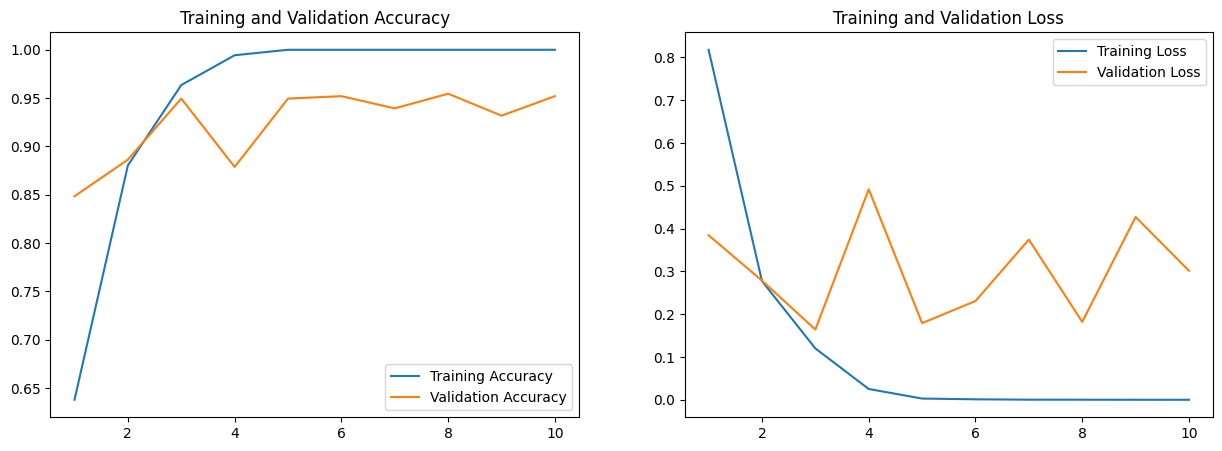

In [ ]:
# Confusion Matrix and Classification Report
validation_steps = len(validation_generator)
class_names = list(validation_generator.class_indices.keys())

y_true = []
y_pred = []

for i in range(validation_steps):
    x_val, y_val = next(validation_generator)
    y_true.extend(np.argmax(y_val, axis=1))
    y_pred.extend(np.argmax(model.predict(x_val), axis=1))

conf_matrix = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred, target_names=class_names)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plotting Accuracy and Loss Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
